In [91]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from src.components.model_prediction import evaluation_metrics, predict_and_plot
import yfinance as yf
import numpy as np
from src.components.data_preprocessor import MinMaxScaling, PreProcessor
from src.components.data_splitter import CustomDataSplittingStrategy, DataSplitter, create_sequences
from src.components.model_building import GRUModelBuilder, LSTMModelBuilder, ModelBuilder, RNNMdelBuilder

In [92]:
data = pd.read_csv('D:\coding\ml\stock-price-predictor\src\components\data\AAPL_stock_data.csv')


In [93]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = data[['Close']]
scaled_data = scaler.fit_transform(data)

In [94]:
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Create sequences for the models
def create_sequences(data, time_step=60):
    x, y = [], []
    for i in range(time_step, len(data)):
        x.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

time_step = 60
x_train, y_train = create_sequences(train_data, time_step)
x_test, y_test = create_sequences(test_data, time_step)

# Reshape data for LSTM/RNN/GRU input
X_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
X_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(944, 60, 1)
(944,)
(192, 60, 1)
(192,)


In [95]:
predict_models = {}

model_builder = ModelBuilder(LSTMModelBuilder())
lstm_model = model_builder.compile_model(X_train=X_train)
predict_models['lstm_model'] = lstm_model

model_builder.set_strategy(RNNMdelBuilder())
rnn_model = model_builder.compile_model(X_train=X_train)
predict_models['rnn_model'] = rnn_model

model_builder.set_strategy(GRUModelBuilder())
gru_model = model_builder.compile_model(X_train=X_train)
predict_models['gru_model'] = gru_model

c:\Users\aumpa\anaconda3\envs\stockenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



begining model training for lstm_model
-----------------------------------------------


Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_37 (LSTM)                  │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_38 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

None
model history completed for lstm_model
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
Mean Squared Error: 19.678511571251885
Mean Absolute Error: 3.566268046696981
R^2 Score: 0.9639549637999087
lstm_model => 19.678511571251885
lstm_model => 3.566268046696981
lstm_model => 0.9639549637999087
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


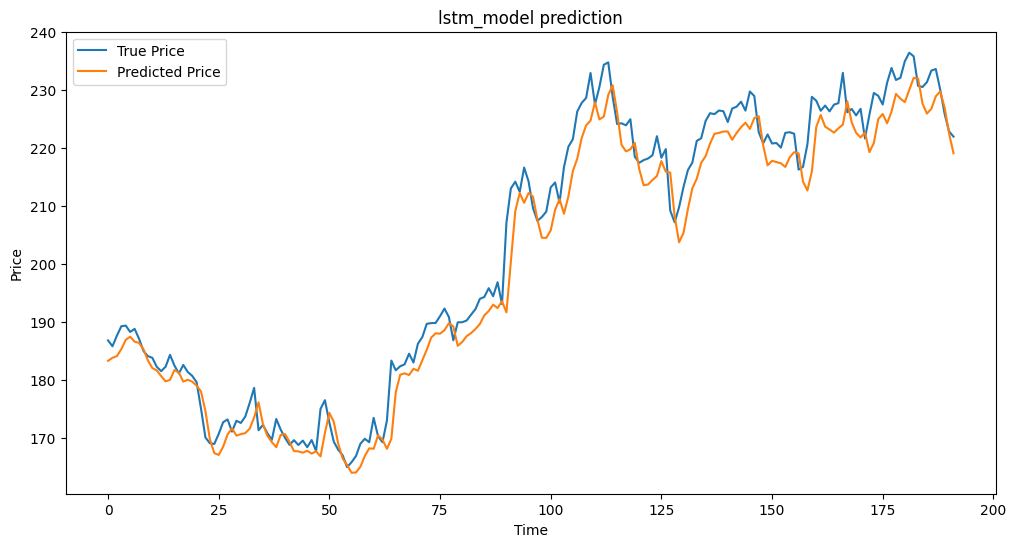


begining model training for rnn_model
-----------------------------------------------


Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_26 (SimpleRNN)       │ (None, 60, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_27 (SimpleRNN)       │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,701 (30.08 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

None
model history completed for rnn_model
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
Mean Squared Error: 19.97030679574286
Mean Absolute Error: 3.5040129025777187
R^2 Score: 0.9634204838728214
rnn_model => 19.97030679574286
rnn_model => 3.5040129025777187
rnn_model => 0.9634204838728214
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


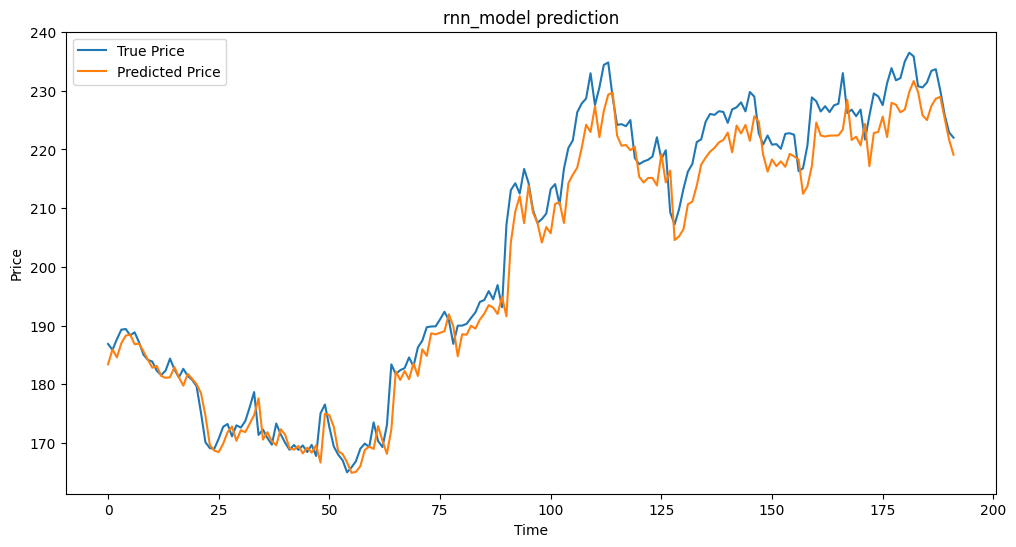


begining model training for gru_model
-----------------------------------------------


Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_26 (GRU)                    │ (None, 60, 50)         │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_27 (GRU)                    │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,301 (91.02 KB)

 Trainable params: 23,301 (91.02 KB)

 Non-trainable params: 0 (0.00 B)

None
model history completed for gru_model
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  
Mean Squared Error: 9.213762856730085
Mean Absolute Error: 2.223560412724812
R^2 Score: 0.9831231943276102
gru_model => 9.213762856730085
gru_model => 2.223560412724812
gru_model => 0.9831231943276102
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


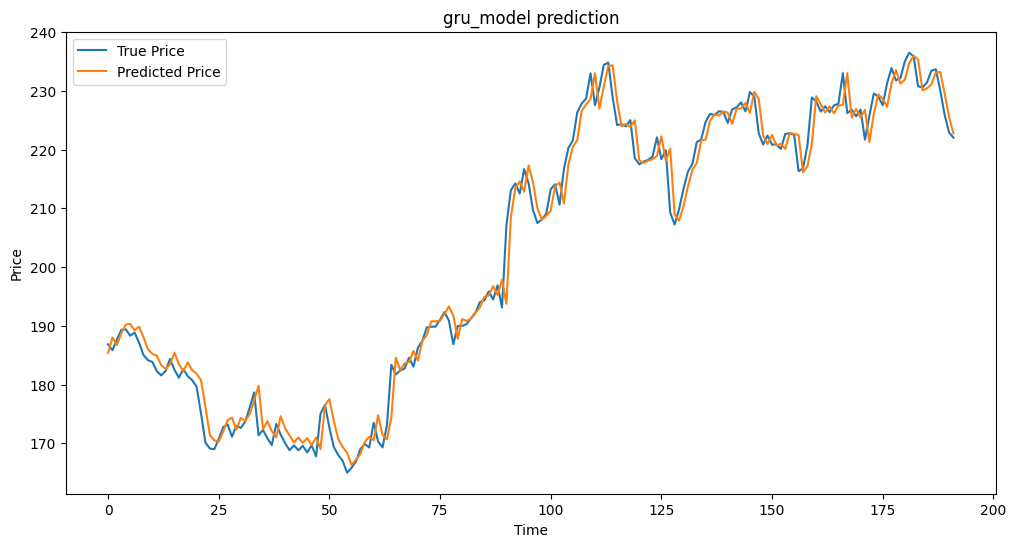

In [96]:
model_history = {}

for key,model in predict_models.items():
    print()
    print(f"begining model training for {key}")
    print("-----------------------------------------------")
    print(model.summary())
    model_history[f"{key}_history"] = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0,validation_data=(X_test,y_test))
    print(f"model history completed for {key}")
    mse,mae,r2 = evaluation_metrics(X_test,y_test,scaler,model)
    print(f"{key} => {mse}")
    print(f"{key} => {mae}")
    print(f"{key} => {r2}")
    print("========================================================================")
    predict_and_plot(model,X_test,y_test,scaler,title=f"{key} prediction")
